<a href="https://colab.research.google.com/github/Francisco2963/Vino_Tinto-ML/blob/main/Clasificaci%C3%B3n_b%C3%A1sica_Predicci%C3%B3n_de_Calidad_del_Vino_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Calidad del Vino (Core)

Objetivo

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

Dataset: Wine Quality Dataset

Descripción del Dataset: Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

Instrucciones:

 1. Carga y Exploración de Datos:

Cargar el dataset y revisar su estructura básica.

Describir las variables y su distribución.

Identificar y tratar valores nulos y outliers.

 2. Preprocesamiento de Datos:

Seleccionar características importantes para la clasificación.

Transformar variables categóricas en variables numéricas si es necesario.

Dividir los datos en conjuntos de entrenamiento y prueba.

Escalar las características.

 3. Entrenamiento de Modelos de Clasificación:

Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).

Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

 4. Evaluación de Modelos:

Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.

Generar un informe de clasificación para cada modelo.

Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

 5. Análisis y Comparación de Resultados:

Comparar el rendimiento de los diferentes modelos.

Discutir cuál modelo ofrece el mejor rendimiento y por qué.

Identificar las fortalezas y debilidades de cada enfoque en este contexto.

 6. Repositorio en GitHub:

Crear un repositorio en GitHub con el código y los resultados del análisis.

Crear un tag de liberación con una breve descripción de la versión final del proyecto.

Adicional:

Añadir un archivo README.md en el repositorio de GitHub que explique el propósito del proyecto, las técnicas utilizadas y cómo ejecutar el código.
Incluir una presentación o informe detallado en formato PDF con todos los hallazgos y conclusiones del análisis.

Nota: Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

In [39]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [42]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [43]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
df.duplicated().sum()

240

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [48]:
df = df.reset_index(drop=True)
# se incluye este codigo porque df.info tiene un indice de 1359 entradas desde 0 a 1598 ( no es igual a 5436)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


Identificacion de valores Outliers

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
def calcular_outliers(df, columna):
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
  return outliers, Q1, Q3, IQR

outliers_fixed_acidity, Q1_fixed_acidity, Q3_fixed_acidity, IQR_fixed_acidity = calcular_outliers(df, 'fixed acidity')
outliers_volatile_acidity, Q1_volatile_acidity, Q3_volatile_acidity, IQR_volatile_acidity = calcular_outliers(df, 'volatile acidity')
outliers_citric_acid, Q1_citric_acid, Q3_citric_acid, IQR_citric_acid = calcular_outliers(df, 'citric acid')
outliers_residual_sugar, Q1_residual_sugar, Q3_residual_sugar, IQR_residual_sugar = calcular_outliers(df, 'residual sugar')
outliers_chlorides, Q1_chlorides, Q3_chlorides, IQR_chlorides = calcular_outliers(df, 'chlorides')
outliers_free_sulfur_dioxide, Q1_free_sulfur_dioxide, Q3_free_sulfur_dioxide, IQR_free_sulfur_dioxide = calcular_outliers(df, 'free sulfur dioxide')
outliers_total_sulfur_dioxide, Q1_total_sulfur_dioxide, Q3_total_sulfur_dioxide, IQR_total_sulfur_dioxide = calcular_outliers(df, 'total sulfur dioxide')
outliers_density, Q1_density, Q3_density, IQR_density = calcular_outliers(df, 'density')
outliers_pH, Q1_pH, Q3_pH, IQR_pH = calcular_outliers(df, 'pH')
outliers_sulphates, Q1_sulphates, Q3_sulphates, IQR_sulphates = calcular_outliers(df, 'sulphates')
outliers_alcohol, Q1_alcohol, Q3_alcohol, IQR_alcohol = calcular_outliers(df, 'alcohol')
outliers_quality, Q1_quality, Q3_quality, IQR_quality = calcular_outliers(df, 'quality')


print(f'Outliers en fixed acidity: \n{len(outliers_fixed_acidity)}')

print(f'Outliers en volatile acidity: \n{len(outliers_volatile_acidity)}')

print(f'Outliers en citric acid: \n{len(outliers_citric_acid)}')

print(f'Outliers en residual sugar: \n{len(outliers_residual_sugar)}')

print(f'Outliers en chlorides: \n{len(outliers_chlorides)}')

print(f'Outliers en free sulfur dioxide: \n{len(outliers_free_sulfur_dioxide)}')

print(f'Outliers en total sulfur dioxide: \n{len(outliers_total_sulfur_dioxide)}')

print(f'Outliers en density: \n{len(outliers_density)}')

print(f'Outliers en pH: \n{len(outliers_pH)}')

print(f'Outliers en sulphates: \n{len(outliers_sulphates)}')

print(f'Outliers en alcohol: \n{len(outliers_alcohol)}')

print(f'Outliers en quality: \n{len(outliers_quality)}')




Outliers en fixed acidity: 
41
Outliers en volatile acidity: 
19
Outliers en citric acid: 
1
Outliers en residual sugar: 
126
Outliers en chlorides: 
87
Outliers en free sulfur dioxide: 
26
Outliers en total sulfur dioxide: 
45
Outliers en density: 
35
Outliers en pH: 
28
Outliers en sulphates: 
55
Outliers en alcohol: 
12
Outliers en quality: 
27


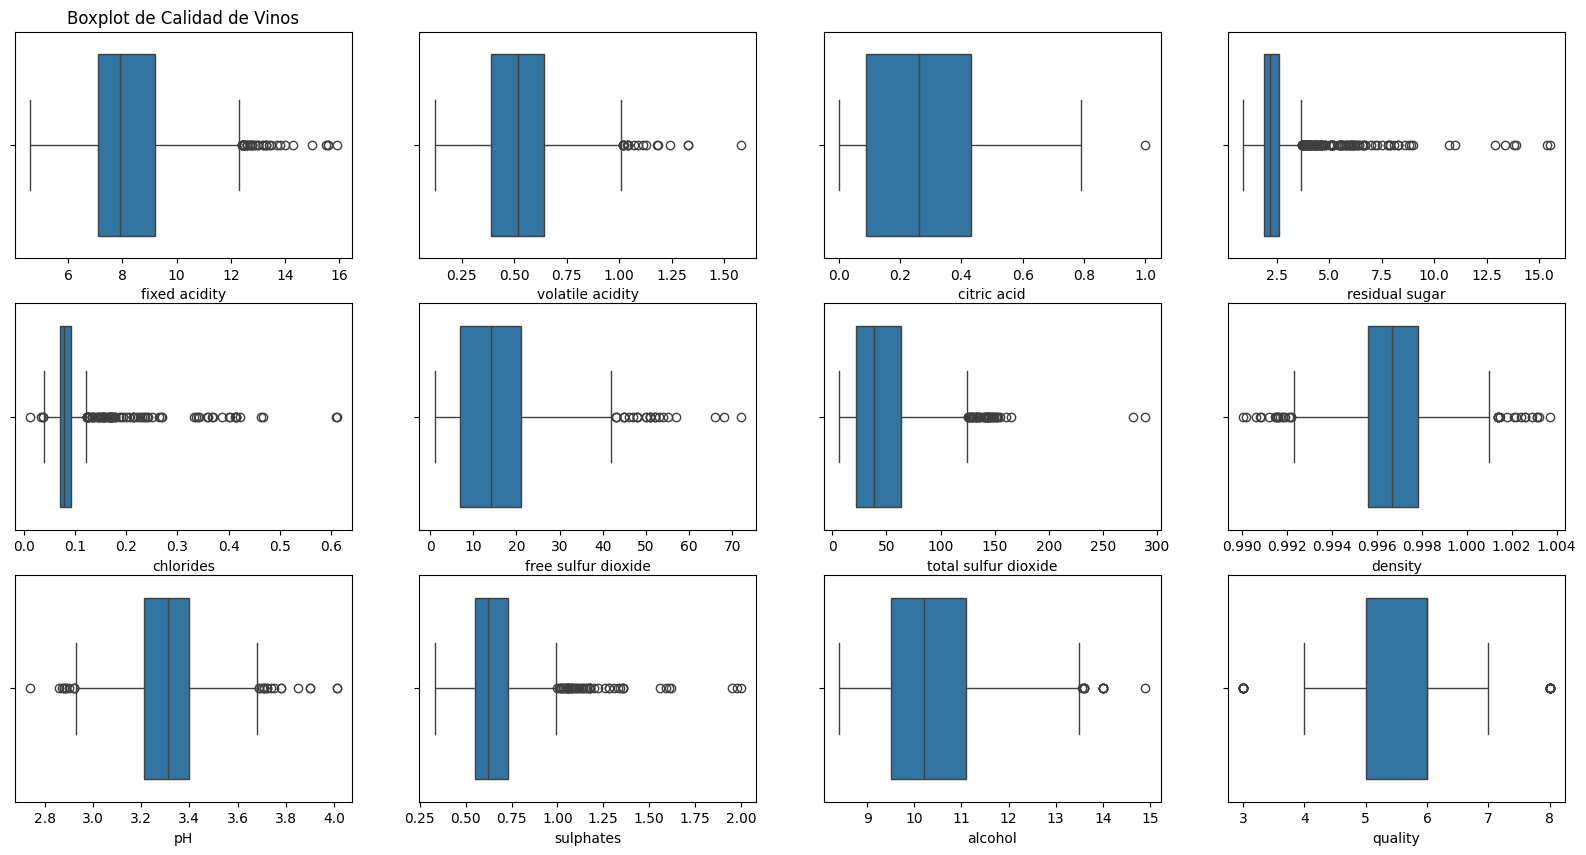

In [53]:
plt.figure(figsize=(20,10))

plt.subplot(3, 4, 1)
sns.boxplot(x=df['fixed acidity'])
plt.title('Boxplot de Calidad de Vinos')
plt.xlabel('fixed acidity')

plt.subplot(3,4,2)
sns.boxplot(x=df['volatile acidity'])
plt.xlabel('volatile acidity')

plt.subplot(3,4,3)
sns.boxplot(x=df['citric acid'])
plt.xlabel('citric acid')

plt.subplot(3,4,4)
sns.boxplot(x=df['residual sugar'])
plt.xlabel('residual sugar')

plt.subplot(3,4,5)
sns.boxplot(x=df['chlorides'])
plt.xlabel('chlorides')

plt.subplot(3,4,6)
sns.boxplot(x=df['free sulfur dioxide'])
plt

plt.subplot(3,4,7)
sns.boxplot(x=df['total sulfur dioxide'])
plt.xlabel('total sulfur dioxide')

plt.subplot(3,4,8)
sns.boxplot(x=df['density'])
plt.xlabel('density')

plt.subplot(3,4,9)
sns.boxplot(x=df['pH'])
plt.xlabel('pH')

plt.subplot(3,4,10)
sns.boxplot(x=df['sulphates'])

plt.xlabel('sulphates')

plt.subplot(3,4,11)
sns.boxplot(x=df['alcohol'])
plt.xlabel('alcohol')

plt.subplot(3,4,12)
sns.boxplot(x=df['quality'])
plt.xlabel('quality')

plt.show()

In [54]:
corr = df.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [55]:
import seaborn as sns

<Axes: >

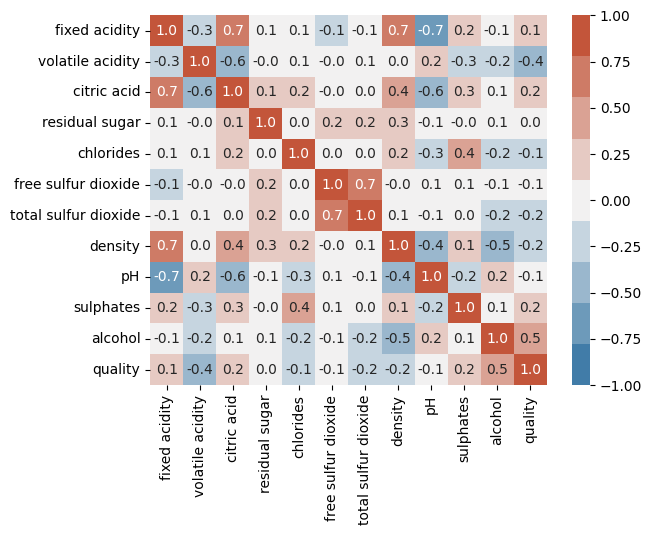

In [56]:
sns.heatmap(corr, cmap = sns.diverging_palette(240, 20, n = 9), annot = True, fmt = '.1f', vmin = -1, vmax = 1)

# PP

In [57]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [95]:
X = df.drop('quality', axis = 'columns')
y = df['quality']

In [96]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [97]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [98]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1354,6
1355,5
1356,6
1357,5


In [99]:
y.describe()

,quality
count,1359.000000
mean,5.623252
std,0.823578
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
dtypes: float64(11)
memory usage: 116.9 KB


In [102]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [104]:
#columnas numericas
variables_num =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
                "total sulfur dioxide","density","pH","sulphates","alcohol"]
num_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)

#columnas categoricas
#variabled_cat =[]
#cat_transformer = Pipeline(
 #    steps=[
  #      ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputación
   #     ("onehot",  OneHotEncoder(handle_unknown="ignore"))  # Codificación categorica
    #]
#)

#se incluye un columntransformer para agrupar todas las transformaciones realizadas
preprocessor = ColumnTransformer(
    transformers=[
        ("num",num_transformer,variables_num)
       # ,("cat",cat_transformer,variabled_cat)
    ]
)

# Pipeline final que incluye imputación condicional categórica, numerica y modelo
pipeline_KNNC = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=20))
])

pipeline_RFC = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(max_depth=10,n_estimators=500))
])

pipeline_LR = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(penalty='l2', C=1.0, solver='lbfgs',
                                 max_iter=100, tol=1e-4, random_state=42))
])



In [105]:
pipeline_KNNC.fit(X_train, y_train)
pipeline_RFC.fit(X_train, y_train)
pipeline_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model', LogisticRegression(random_state=42))])

In [106]:
y_pred_KNNC = pipeline_KNNC.predict(X_test)
y_pred_RFC = pipeline_RFC.predict(X_test)
y_pred_LR = pipeline_LR.predict(X_test)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Evaluar KNNC (Clasificacion Multiple)

Exactitud: 0.5857843137254902
Classification report for KNNC
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.61      0.74      0.67       172
           6       0.54      0.57      0.56       164
           7       0.66      0.38      0.48        50
           8       0.00      0.00      0.00         4

    accuracy                           0.59       408
   macro avg       0.30      0.28      0.28       408
weighted avg       0.56      0.59      0.56       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


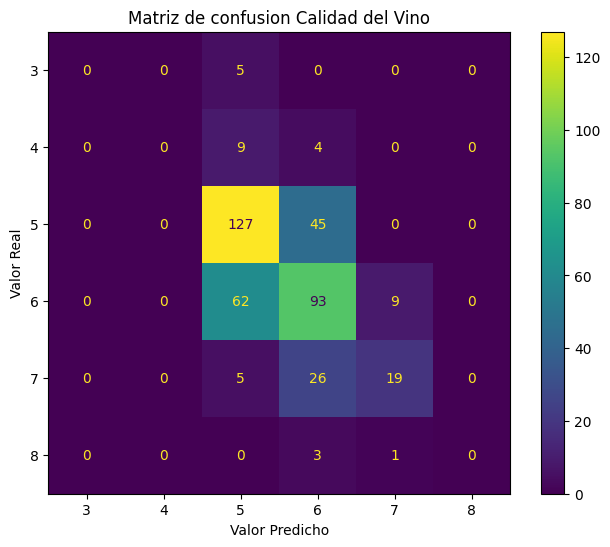

In [115]:
cm=confusion_matrix(y_test,y_pred_KNNC)
accuracy = accuracy_score(y_test, y_pred_KNNC)
print(f'Exactitud: {accuracy}')
print("Classification report for KNNC")
print(classification_report(y_test,y_pred_KNNC))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Calidad del Vino')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

COMENTARIO

La exactitud de este modelo es de un 58,57% (accuracy)

Las clases 3,4 y 8 presentan un peor desempeño, con valores de precisión, recall y F1-score muy bajos (0). Esto indica que el árbol de decisión tiene dificultades para clasificar correctamente los vinos con estas calificaciones.

Las clases 5 y 6, muestran un desempeño más aceptable, especialmente en términos de precision, la clase 5 tiene un 61%, clasificando bien 127 vinos y confundiendo 45 vinos como clase 6.

Para el recall las clases 5 y 6 fueron mejor clasificadas. Por ejemplo, para la clase 5, el recall es de 0.74, lo que significa que el modelo identificó correctamente el 74% de las muestras que realmente pertenecían a la clase 5.


MATRIZ DE CONFUSION

La diagonal principal (que representa las predicciones correctas) muestra que el modelo tiene un buen desempeño en la clasificación de vinos con calidad 5 y 6. Sin embargo, hay un número considerable de errores en la clasificación de las clases minoritarias (3, 4, 7 y 8).


El modelo confunde las clases de vinos que son adyacentes en la escala de calidad. Por ejemplo, hay varios casos en los que vinos de calidad 5 se clasifican como 4 o 6. Esto sugiere que las diferencias entre estas clases pueden ser sutiles y difíciles de capturar para el modelo.

Algunos errores son más frecuentes que otros. Por ejemplo, parece haber más casos en los que vinos de calidad 5 se clasifican como 6 que al revés.


# Evaluar RFC

Exactitud: 0.6225490196078431
Classification report for RFC
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.69      0.72      0.70       172
           6       0.57      0.70      0.63       164
           7       0.59      0.34      0.43        50
           8       0.00      0.00      0.00         4

    accuracy                           0.62       408
   macro avg       0.31      0.29      0.29       408
weighted avg       0.59      0.62      0.60       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


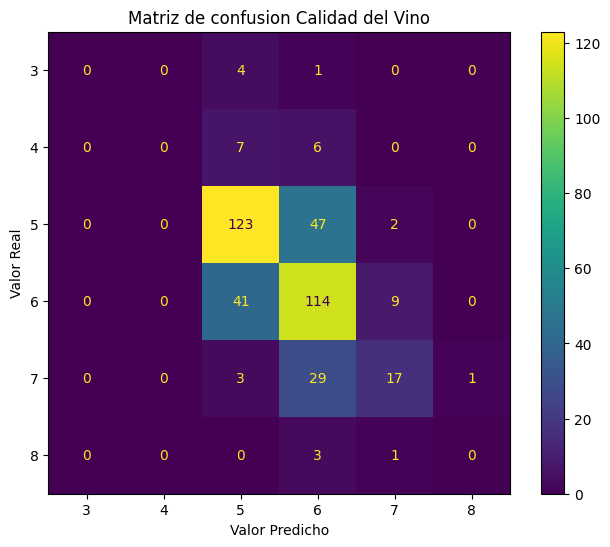

In [119]:
cm=confusion_matrix(y_test,y_pred_RFC)
accuracy = accuracy_score(y_test, y_pred_RFC)
print(f'Exactitud: {accuracy}')
print("Classification report for RFC")
print(classification_report(y_test,y_pred_RFC))
cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Calidad del Vino')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

COMENTARIO

Las clases 3, 4 y 8 siguen presentando un desempeño muy bajo, con valores de precisión, recall y F1-score todos en cero. Esto indica que el modelo de Random Forest también tiene dificultades para clasificar correctamente los vinos con estas calificaciones.

Las clases 5 y 6 muestran un desempeño un poco mas aceptable, con valores de precisión, recall y F1-score moderadamente altos, aunque ninguno llega al 75%. Esto indica que el modelo es capaz de identificar correctamente una proporción significativa de los vinos que pertenecen a estas clases.

El F1-score promedio es ligeramente superior al del KNN, lo que sugiere que el Random Forest puede estar logrando un mejor equilibrio entre precisión y recall para algunas clases.

La precisión general del modelo (accuracy) ha mejorado ligeramente en comparación con el  KNN, este modelo tiene una precision de 62,25% lo que indica que el Random Forest está obteniendo mejores resultados en general, sin ambargo sigue siendo bajo.

MAREIZ DE CONFUSION

La diagonal principal, que representa las predicciones correctas, muestra que el modelo tiene un buen desempeño en la clasificación de vinos con calidad 5 y 6. Sin embargo, hay un número considerable de errores en la clasificación de las clases minoritarias (3, 4, 7 y 8).

Al igual que en KNNC, el modelo tiende a confundir clases que son adyacentes en la escala de calidad. Por ejemplo, hay varios casos en los que vinos de calidad 5 se clasifican como 4 o 6. Esto sugiere que las diferencias entre estas clases pueden ser sutiles y difíciles de capturar para el modelo.

Algunos errores son más frecuentes que otros. Por ejemplo, parece haber más casos en los que vinos de calidad 5 se clasifican como 6 que al revés.


# Evaluar LR

In [117]:
# Realizar predicciones en el conjunto de prueba
y_pred_LR = pipeline_LR.predict(X_test)
y_prob_LR = pipeline_LR.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

Exactitud: 0.6053921568627451
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.67      0.76      0.71       172
           6       0.57      0.59      0.58       164
           7       0.53      0.40      0.45        50
           8       0.00      0.00      0.00         4

    accuracy                           0.61       408
   macro avg       0.29      0.29      0.29       408
weighted avg       0.58      0.61      0.59       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


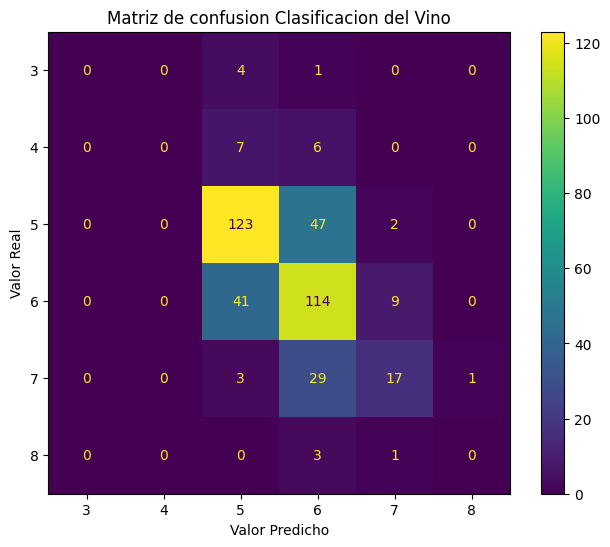

In [118]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_LR)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_LR))
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_LR)
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Clasificacion del Vino')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

El modelo tuvo una exactitud del 60.54%, lo que significa que acertó en clasificar correctamente el 60.54% de los vinos, un poco mas bajo que RF pero mejor que KNN.

La precision de este modelo al predecir una clase específica. Por ejemplo, para la clase 5, una precisión de 0.67 significa que de todos los vinos que el modelo predijo como de calidad 5, el 67% realmente lo eran.

En el Recall Indica qué los vinos de una clase específica fueron correctamente identificados por el modelo. Por ejemplo, para la clase 5, un recall de 0.76 significa que el modelo identificó correctamente el 76% de todos los vinos que realmente eran de calidad 5.

El fi-score promedio es casi igual que el modelo anterior y un poquito mejor que el KNN

MATRIZ DE CONFUSION

Al igual que los dos modelos anteriores, este modelo se comporta mejor en la clasificacion de los vimos 5 y 6, que son los vinos donde hay mas muestras, para los vinos de las otras clasificaciones donde las muestras son mas pequeñas, el modelo no se comporta bien, seguramente, al igual que los otros modelos tiene dificultades para clasificarlas porque supuestamente las caracteristicas de estas muestras son mas dificiles de capturar. Esta hipotesis podria afirmarse en que el modelo tiende a clasificar vinos de la clase 5 como clase 6



COMENTARIO DE LOS 3 MODELOS

Al comparar esta matriz de confusión con las de los otros modelos (KNN y RF), podemos observar que:

El Random Forest sigue siendo el mejor modelo en términos generales: El Random Forest muestra un menor número de errores en la clasificación de las clases mayoritarias (5 y 6) y una distribución más uniforme de los errores en las clases minoritarias.

A pesar de ser el mejor modelo, el Random Forest sigue teniendo dificultades para clasificar correctamente las clases minoritarias.

El bajo rendimento de los 3 modelos podrian ser por el no tratamiento de los valores outliers y junto a ello, la eleccion correcta de las columnas para realizar los modelos, en este caso usamos todas las columnas, este modelo podria mejorar si tratamos algunos aotliers y elejimos mejor las variables a analizar en los modelos.

